<h1>Лабораторная работа №2</h1>
<h2>По курсу "Системы аналитических вычислений"</h2>
<h4>Студент группы М8О-201Б: Богачев Тимофей</h4> <br>
<br>
<h2>Задание 2.1 - Исследование функции. Вариант А.</h2>

## Дихотомия и метод Ньютона

In [1]:
y = x^3 - 9*x^2 + 23*x - 15
show(y)

x^3 - 9*x^2 + 23*x - 15

In [2]:
y(x) = x^3 - 9*x^2 + 23*x - 15

x_solve = solve(y == 0, x)
show("Решим с помощью функции solve")
show(x_solve)

'Решим с помощью функции solve'

[x == 1, x == 5, x == 3]

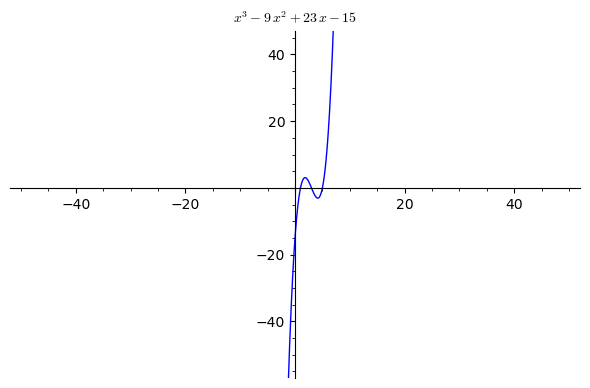

In [3]:
plot.options["xmin"] = -50
plot.options["xmax"] = 50
plot.options["ymin"] = -55
plot.options["ymax"] = 45

func = x^3 - 9*x^2 + 23*x - 15
plot(func, title="${}$".format(latex(func)))

### Метод Ньютона

In [4]:
def newton(f, a, b, EPS):
    x1 = a
    x2 = (a + b) / 2
    
    df = f.derivative()

    while abs(x2 - x1) >= EPS:
        x1 = x2
        x2 = x1 - f(x=x1)/df(x=x1)

    return x1

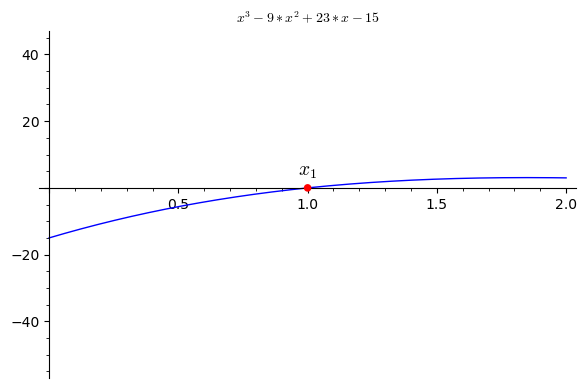

In [5]:
EPS = 1e-5
a = 1
b = 1.7

x_1 = newton(func, a, b, EPS)

p1 = plot(func,(0,2), title="${}$".format(func))
p1 += point((x_1, 0), color="red", size=30, zorder=20)
p1 += text(r"$x_1$", (x_1, 5), color="black", fontsize=14)

p1.show()

In [6]:
### Метод Дихотомии

In [7]:
def dichotomy(f, a, b, eps=1e-7):
    if f(x = a) * f(x = b) > 0:
        return None
    
    m = (a + b) / 2.0
    if abs(f(x = m).n()) < eps:
        return m
    
    if f(x = m) * f(x = a) < 0:
        return dichotomy(f, a, m)
    else:
        return dichotomy(f, m, b)

In [8]:
### Визуализация метода Ньютона и метода Дихотомии

In [9]:
def interaction_function(_step):
    return plot((x^3 - 9*x^2 + 23*x - 15*_step), (x, 0, 10))

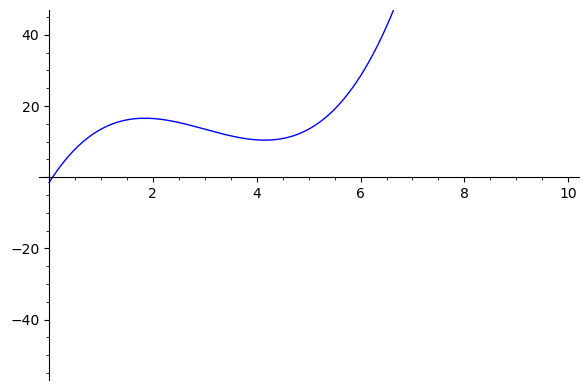

In [10]:
interaction_function(0.1)

In [11]:
@interact
def _(step=(1, 10, 0.1)):
    show(interaction_function(_step=step))

Interactive function <function _ at 0x6fff07ad8a70> with 1 widget
  step: FloatSlider(value=5.0, description='…

In [12]:

from sage.repl.ipython_kernel.interact import interact

xmin = -20
xmax = 20
EPS = 1e-7

a = (0, 2, 0.5)
b = (0, 2, 0.5)
step = (1, 2, 1)


@interact
def interact_newton_and_dih(a = a, b = b, step = step):
    f(x) = y(x)
    xmin = -1
    xmax = 6
    ymin = -4
    ymax = 5
    eps = 1e-7
    
    dih_roots = [dichotomy(f, a, b, eps)]
    dih_roots.append(dichotomy(f, a + step, b + step, eps))
    dih_roots.append(dichotomy(f, a + 2*step, b + 2*step, eps))
    
    newt_roots = [newton(f, a, b, eps)]
    newt_roots.append(newton(f, a+step, b+step, eps))
    newt_roots.append(newton(f, a+2*step, b+2*step, eps))
    
    show("Метод дихотомии - красные графики")
    show("Метод Ньютона - синие")
    gr = [plot(f, (x, xmin, xmax), ymin = ymin, ymax = ymax, aspect_ratio = 1, figsize = [3,2], color = 'red')] * 3
    gr.extend([plot(f, (x, xmin, xmax), ymin = ymin, ymax = ymax, aspect_ratio = 1, figsize = [3,2], color = 'blue')] * 3)
    for i in range(len(gr)):
        if i <= 2 and dih_roots[i] is not None:
            gr[i] += point((float(dih_roots[i]), 0), color='green', aspect_ratio=1, size=30)
        if i > 2 and newt_roots[i-3] is not None:
            gr[i] += point((float(newt_roots[i-3]), 0), color='green', aspect_ratio=1, size=30)

    #вывод массива графиков
    graphics_array([[gr[0], gr[1], gr[2]], [gr[3], gr[4], gr[5]]]).show(frame=True)

    res_str = "Дихотомия: "
    for root in dih_roots:
        if root is not None:
            res_str += str(round(float(root))) + " "
            
    res_str += "\nМетод Ньютона: "
    for root in newt_roots:
        if root is not None:
            res_str += str(round(float(root))) + " "
    show(res_str)

Interactive function <function interact_newton_and_dih at 0x6fff07634ef0> with 3 widgets
  a: FloatSlider(valu…

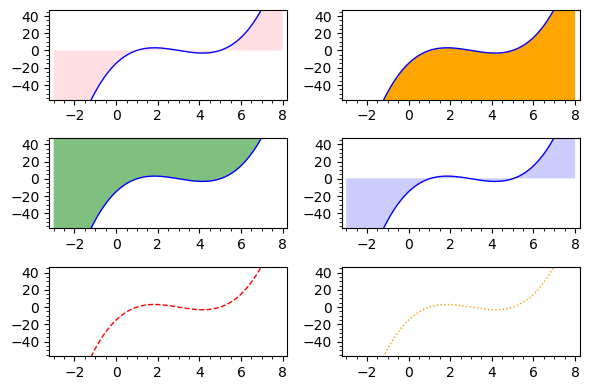

In [13]:
p1 = plot(x^3 - 9*x^2 + 23*x - 15, (x,-3,8), fill='axis', fillcolor='pink')
p2 = plot(x^3 - 9*x^2 + 23*x - 15, (x,-3,8), fill='min', fillalpha=1, fillcolor='orange')
p3 = plot(x^3 - 9*x^2 + 23*x - 15, (x,-3,8), fill='max' , fillcolor='green')
p4 = plot(x^3 - 9*x^2 + 23*x - 15, (x,-3,8), fill=1/2, fillcolor='blue', fillalpha=.2)
p5 = plot(x^3 - 9*x^2 + 23*x - 15, (x,-3,8), rgbcolor=hue(1), linestyle="--")
p6 = plot(x^3 - 9*x^2 + 23*x - 15, (x,-3,8), rgbcolor=hue(0.1), linestyle=":")

graphics_array([[p1, p2], [p3, p4], [p5, p6]]).show(frame=True, axes=False)

<h2>Задание 2.2 - Нахождение НОД</h2>

In [14]:
R, (x, y) = PolynomialRing(QQ,'x, y').objgens()
f = 5*x^4 - 15*x^3 + 15*x^2 - 5*x
g = -22*x^5 +33*x^4 - 11*x^3 - 99*x + 99
show("f = ", f)
show("g = ", g)

'f = ' 5*x^4 - 15*x^3 + 15*x^2 - 5*x

'g = ' -22*x^5 + 33*x^4 - 11*x^3 - 99*x + 99

In [15]:
gcd_res = gcd(f, g)
show("встроенная ф-ия gcd: НОД = ", gcd_res)

'встроенная ф-ия gcd: НОД = ' x - 1

In [16]:
#### my_gcd

In [17]:
def my_gcd(a, b):
    while a != 0 and b != 0:
        if a >= b:
            a %= b
        else:
            b %= a
    return a or b

In [18]:
my_gcd_res = my_gcd(f, g) #* 441 / 1936
show("моя ф-ия gcd: НОД = ", my_gcd_res)

'моя ф-ия gcd: НОД = ' -6336/49*x + 6336/49

In [19]:
diff = gcd_res / my_gcd_res

show("Результат my_gcd совпадает с gcd при умножении на ", diff)
show("При умножении получим .", my_gcd_res * diff)

'Результат my_gcd совпадает с gcd при умножении на ' -49/6336

'При умножении получим .' x - 1

In [20]:
#### Коэффициенты тождества Безу


In [21]:
def bezout(a, b):
    x, xx, y, yy = 1, 0, 0, 1
    while b:
        q, r = a // b, a % b
        a = b
        b = r
        x, xx = xx, x - xx*q
        y, yy = yy, y - yy*q
    return (x, y, a)

In [22]:
bez_coeffs = bezout(f, g)
show("Коэффициенты тождества Безу:")
show("u = ", bez_coeffs[0])
show("v = ", bez_coeffs[1])

'Коэффициенты тождества Безу:'

'u = ' -352/175*x^3 - 1936/1225*x^2 + 4752/1225*x + 1584/245

'v = ' -16/35*x^2 + 16/49*x + 64/49

In [23]:
show("Проверим тождество f*u + v*g = gcd(f, g) :")

show("f*u + v*g = ", f*bez_coeffs[0]+bez_coeffs[1]*g)
show("gcd(f, g) = ", bez_coeffs[2])

if (f*bez_coeffs[0]+bez_coeffs[1]*g) - bez_coeffs[2] == 0:
    show("Получено верное тождество")
else:
    show("Получено неверное тождество")

'Проверим тождество f*u + v*g = gcd(f, g) :'

'f*u + v*g = ' -6336/49*x + 6336/49

'gcd(f, g) = ' -6336/49*x + 6336/49

'Получено верное тождество'